<a href="https://colab.research.google.com/github/karman07/all_ml_dl_r/blob/master/Fake_News_Pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()  # Upload kaggle.json here


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"karmansingharora","key":"e9b63bf02d188db54b4aae3a60c6ed52"}'}

In [2]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d clmentbisaillon/fake-and-real-news-dataset

Dataset URL: https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset
License(s): CC-BY-NC-SA-4.0
  0% 0.00/41.0M [00:00<?, ?B/s]
100% 41.0M/41.0M [00:00<00:00, 1.21GB/s]


In [4]:
!unzip -q fake-and-real-news-dataset.zip

In [5]:
import pandas as pd

fake_df = pd.read_csv("Fake.csv")
true_df = pd.read_csv("True.csv")

print(fake_df.head())
print(true_df.head())


                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  
0  December 31, 2017  
1  December 31, 2017  
2  December 30, 2017  
3  December 29, 2017  
4  December 25, 2017  
                                               title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept t

In [6]:
fake_df.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [7]:
fake_df['label'] = 0  # 0 for Fake
true_df['label'] = 1  # 1 for Real

# Combine the datasets
df = pd.concat([fake_df, true_df]).sample(frac=1).reset_index(drop=True)

In [8]:
print(df.info())
print(df['label'].value_counts())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB
None
label
0    23481
1    21417
Name: count, dtype: int64


,title,text,subject,date,label
0,FOLLOW THE MONEY: MEXICAN GIVEAWAY OF MILLIONS...,Follow the money on this one Mexico is spendin...,Government News,"Aug 13, 2015",0
1,WHAT THE MEDIA’S NOT TELLING YOU About The Man...,Just another nice immigrant family trying to a...,politics,"May 23, 2017",0
2,"Pence says 'disappointed' over Flynn, supporte...",BRUSSELS (Reuters) - U.S. Vice President Mike ...,politicsNews,"February 20, 2017",1
3,White House candidate Trump announces Pence as...,WASHINGTON (Reuters) - Republican Donald Trump...,politicsNews,"July 15, 2016",1
4,BREAKING! INVESTIGATION: Hillary Clinton Did N...,Was Hillary Clinton negligent or was she doin...,politics,"May 25, 2016",0


In [9]:
df.isnull().sum()

,0
title,0
text,0
subject,0
date,0
label,0


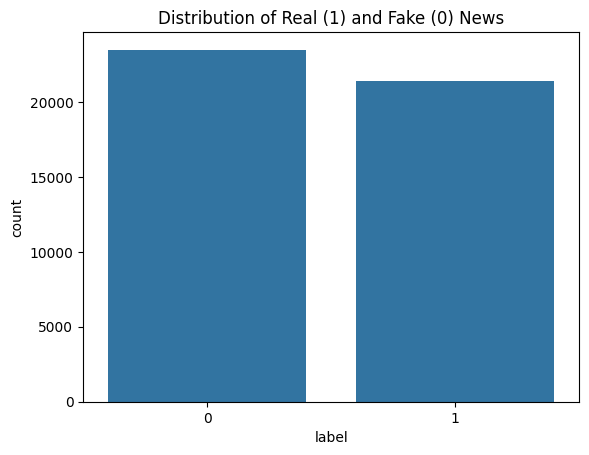

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='label', data=df)
plt.title('Distribution of Real (1) and Fake (0) News')
plt.show()


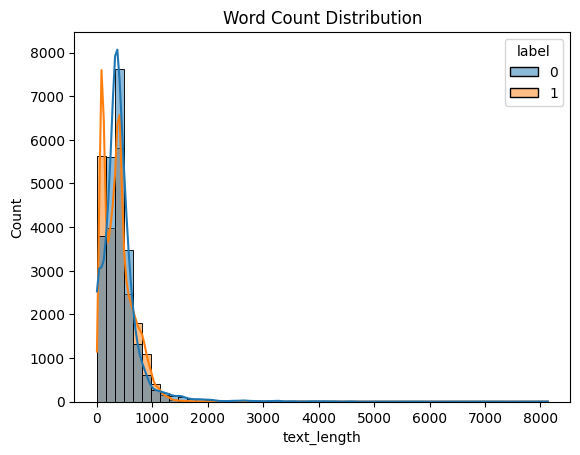

In [11]:
df['text_length'] = df['text'].apply(lambda x: len(str(x).split()))
sns.histplot(data=df, x='text_length', hue='label', bins=50, kde=True)
plt.title('Word Count Distribution')
plt.show()

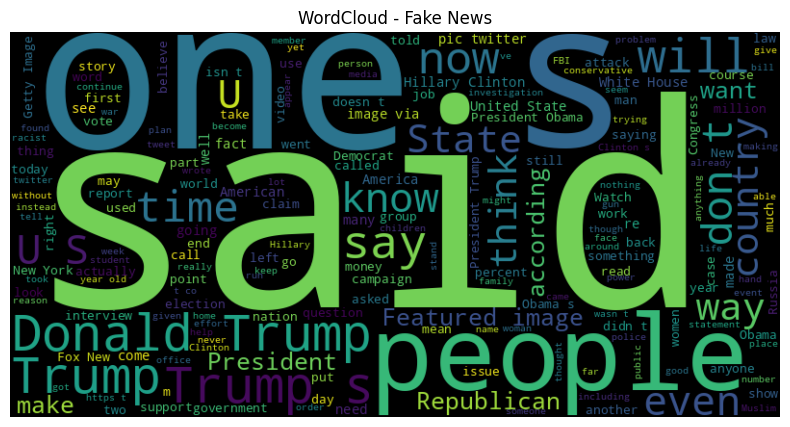

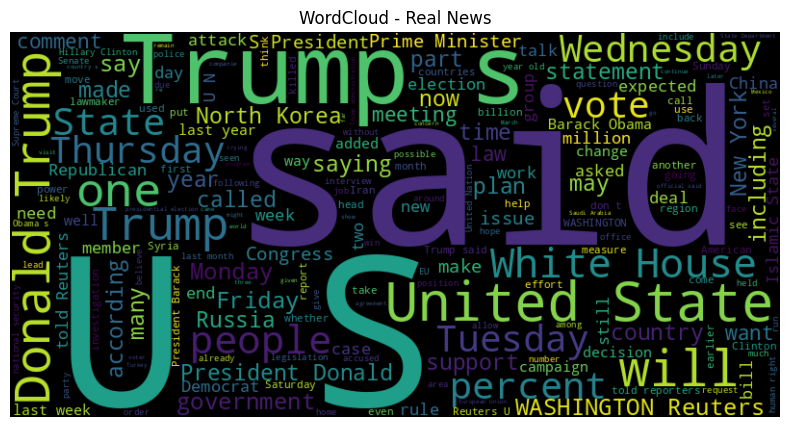

In [12]:
from wordcloud import WordCloud

# WordCloud for Fake news
fake_words = ' '.join(fake_df['text'])
wc_fake = WordCloud(width=800, height=400).generate(fake_words)

plt.figure(figsize=(10,5))
plt.imshow(wc_fake, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud - Fake News")
plt.show()

# WordCloud for Real news
true_words = ' '.join(true_df['text'])
wc_true = WordCloud(width=800, height=400).generate(true_words)

plt.figure(figsize=(10,5))
plt.imshow(wc_true, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud - Real News")
plt.show()

In [13]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):

    text = text.lower()

    text = ''.join([char for char in text if char not in string.punctuation and not char.isdigit()])

    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]

    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

# Apply preprocessing
df['clean_text'] = df['text'].apply(preprocess)
df[['text', 'clean_text']].head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


,text,clean_text
0,Follow the money on this one Mexico is spendin...,follow money one mexico spending billion dolla...
1,Just another nice immigrant family trying to a...,another nice immigrant family trying assimilat...
2,BRUSSELS (Reuters) - U.S. Vice President Mike ...,brussels reuters u vice president mike penny s...
3,WASHINGTON (Reuters) - Republican Donald Trump...,washington reuters republican donald trump’s c...
4,Was Hillary Clinton negligent or was she doin...,hillary clinton negligent purpose either way r...


In [14]:
df.to_csv("cleaned_fake_news.csv", index=False)

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Split data
X_train, X_test, y_train, y_test = train_test_split(df['clean_text'], df['label'], test_size=0.2, random_state=42)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [17]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": MultinomialNB(),
    "Support Vector Machine": LinearSVC(),
    "Random Forest": RandomForestClassifier(n_estimators=100)
}

results = {}

for name, model in models.items():
    print(f"\n🔹 Training {name}...")
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    acc = accuracy_score(y_test, y_pred)
    print(f"✅ Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    results[name] = acc


🔹 Training Logistic Regression...
✅ Accuracy: 0.9902
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4668
           1       0.99      0.99      0.99      4312

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980


🔹 Training Naive Bayes...
✅ Accuracy: 0.9498
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      4668
           1       0.94      0.95      0.95      4312

    accuracy                           0.95      8980
   macro avg       0.95      0.95      0.95      8980
weighted avg       0.95      0.95      0.95      8980


🔹 Training Support Vector Machine...
✅ Accuracy: 0.9963
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4668
           1       1.00      1.00      1.00      4312

    accuracy             

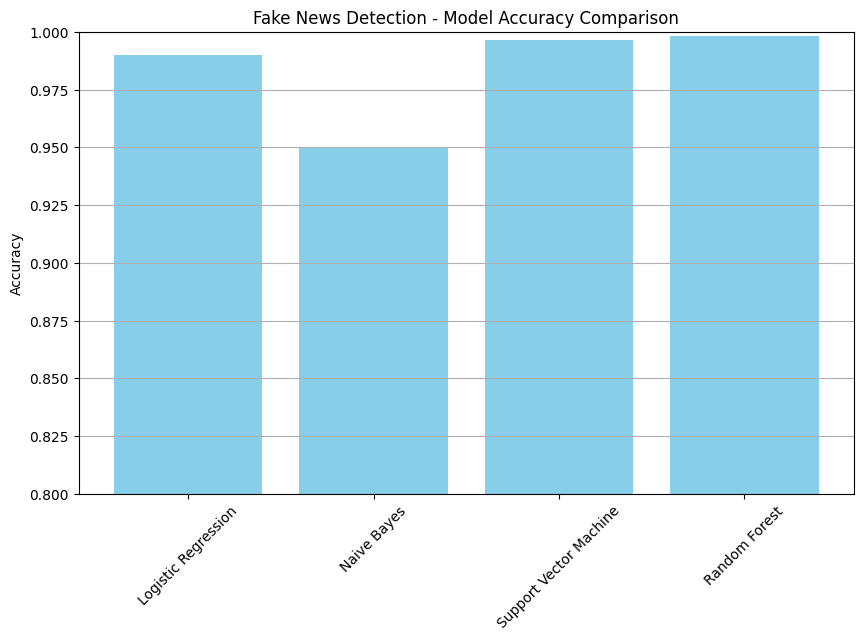

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.bar(results.keys(), results.values(), color='skyblue')
plt.ylabel("Accuracy")
plt.ylim(0.8, 1)
plt.title("Fake News Detection - Model Accuracy Comparison")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [20]:
X_train, X_test, y_train, y_test = train_test_split(df['clean_text'], df['label'], test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train).toarray()
X_test_tfidf = vectorizer.transform(X_test).toarray()

In [21]:
model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train_tfidf.shape[1],)),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
history = model.fit(X_train_tfidf, y_train, epochs=5, batch_size=32, validation_split=0.1)

Epoch 1/5
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 47s 43ms/step - accuracy: 0.9421 - loss: 0.1309 - val_accuracy: 0.9878 - val_loss: 0.0370
Epoch 2/5
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 74s 36ms/step - accuracy: 0.9973 - loss: 0.0105 - val_accuracy: 0.9919 - val_loss: 0.0301
Epoch 3/5
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 38s 37ms/step - accuracy: 0.9984 - loss: 0.0048 - val_accuracy: 0.9914 - val_loss: 0.0309
Epoch 4/5
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 40s 36ms/step - accuracy: 0.9991 - loss: 0.0027 - val_accuracy: 0.9925 - val_loss: 0.0282
Epoch 5/5
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 43s 38ms/step - accuracy: 0.9994 - loss: 0.0022 - val_accuracy: 0.9897 - val_loss: 0.0496


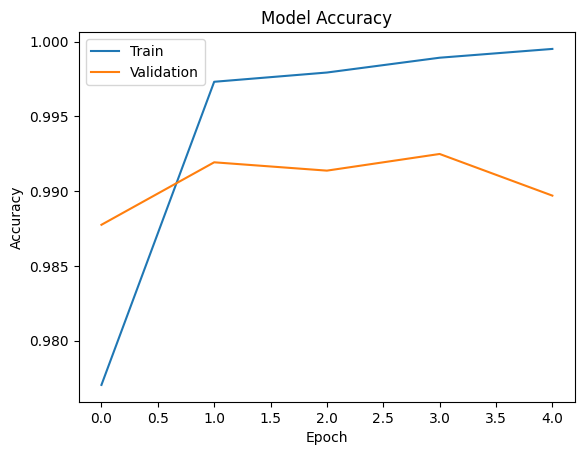

In [23]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [25]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

# Parameters
max_words = 10000     # top 10,000 words
max_len = 200         # max sequence length

# Tokenize
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(df['clean_text'])
sequences = tokenizer.texts_to_sequences(df['clean_text'])
X = pad_sequences(sequences, maxlen=max_len, padding='post', truncating='post')
y = df['label']  # 0 or 1

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

model_lstm = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
    LSTM(64, return_sequences=False),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_lstm.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [27]:
model_lstm.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.1)

Epoch 1/5
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 148s 143ms/step - accuracy: 0.6713 - loss: 0.5799 - val_accuracy: 0.9293 - val_loss: 0.2356
Epoch 2/5
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 220s 161ms/step - accuracy: 0.9211 - loss: 0.2570 - val_accuracy: 0.9736 - val_loss: 0.1021
Epoch 3/5
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 178s 137ms/step - accuracy: 0.9742 - loss: 0.1024 - val_accuracy: 0.9710 - val_loss: 0.1110
Epoch 4/5
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 139s 134ms/step - accuracy: 0.9678 - loss: 0.1195 - val_accuracy: 0.9257 - val_loss: 0.1663
Epoch 5/5
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 144s 136ms/step - accuracy: 0.9785 - loss: 0.0827 - val_accuracy: 0.9841 - val_loss: 0.0564


In [28]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D

model_cnn = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
    Conv1D(128, 5, activation='relu'),
    MaxPooling1D(pool_size=2),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model_cnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_cnn.summary()
model_cnn.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ ?                      │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 94s 91ms/step - accuracy: 0.9215 - loss: 0.1639 - val_accuracy: 0.9981 - val_loss: 0.0072
Epoch 2/5
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 144s 93ms/step - accuracy: 0.9988 - loss: 0.0064 - val_accuracy: 0.9981 - val_loss: 0.0065
Epoch 3/5
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 140s 92ms/step - accuracy: 1.0000 - loss: 0.0010 - val_accuracy: 0.9978 - val_loss: 0.0101
Epoch 4/5
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 90s 89ms/step - accuracy: 0.9999 - loss: 5.7308e-04 - val_accuracy: 0.9983 - val_loss: 0.0134
Epoch 5/5
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 91s 90ms/step - accuracy: 0.9999 - loss: 5.8697e-04 - val_accuracy: 0.9981 - val_loss: 0.0112


In [29]:
from sklearn.metrics import accuracy_score

# LSTM
y_pred_lstm = (model_lstm.predict(X_test) > 0.5).astype(int)
print("LSTM Accuracy:", accuracy_score(y_test, y_pred_lstm))

# CNN
y_pred_cnn = (model_cnn.predict(X_test) > 0.5).astype(int)
print("CNN Accuracy:", accuracy_score(y_test, y_pred_cnn))


281/281 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step
LSTM Accuracy: 0.9838530066815144
281/281 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step
CNN Accuracy: 0.9981069042316258
